In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Gender

In [6]:
data.groupby('Sex')['Survived'].value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [7]:
sex_survived = pd.crosstab(data['Sex'], data['Survived'])

In [8]:
sex_survived.columns = ['No', 'Yes']

In [9]:
sex_survived['total'] = sex_survived.sum(axis=1)

In [10]:
sex_survived

,No,Yes,total
Sex,,,
female,81,233,314
male,468,109,577


In [11]:
sex_survived = sex_survived.apply(lambda x: round(100* x/sex_survived['total']))

In [12]:
sex_survived.drop('total', axis=1, inplace=True)

In [13]:
sex_survived

,No,Yes
Sex,,
female,26.0,74.0
male,81.0,19.0


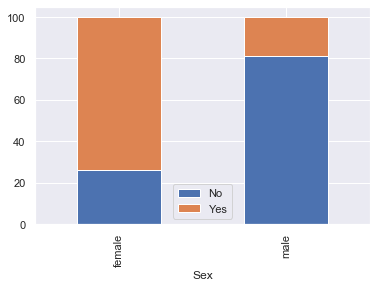

In [14]:
sex_survived.plot(kind='bar',stacked=True)

In [15]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

In [16]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C


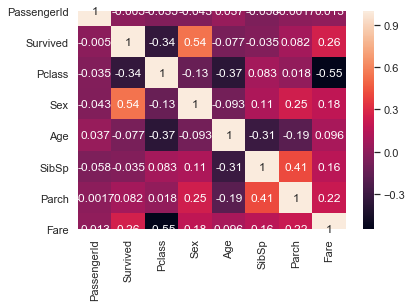

In [17]:
sns.heatmap(data.corr(), annot=True)

In [18]:
training_data = data[['PassengerId', 'Pclass', 'Sex', 'Fare']]

In [19]:
output_data = data['Survived']

In [20]:
training_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Fare           0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X, x_test, Y, y_test = train_test_split(training_data, output_data,
                                       random_state=42, test_size=0.3)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model = LogisticRegression()

In [25]:
model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
predictions = model.predict(x_test)

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [28]:
accuracy_score(predictions, y_test)

0.7910447761194029

In [29]:
test_data = pd.read_csv('test.csv')

In [30]:
training_data.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Fare'], dtype='object')

In [31]:
test_data = test_data[['PassengerId', 'Pclass', 'Sex', 'Fare']]

In [32]:
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

In [33]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Fare           1
dtype: int64

In [34]:
test_data['Fare'] = test_data['Fare'].fillna(training_data['Fare'].mean())

In [35]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Fare           0
dtype: int64

In [36]:
test_predictions = model.predict(test_data)

In [37]:
test_submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

In [38]:
test_submission = test_submission.set_index('PassengerId')

In [39]:
test_submission.to_csv('new_submission.csv')